<a href="https://colab.research.google.com/github/MeenakshiA730/DataScienceIntern/blob/main/internn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

# Try reading the file with a different encoding, like 'latin-1' or 'ISO-8859-1'
df = pd.read_csv("/content/IMDb Movies India.csv", encoding="ISO-8859-1")
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

# Data Cleaning
df["Year"] = df["Year"].str.extract("(\d{4})").astype(float)
df["Duration"] = df["Duration"].str.extract("(\d+)").astype(float)
df["Votes"] = df["Votes"].replace("[^\d.]", "", regex=True).astype(float)

# Fill missing values
df["Year"].fillna(df["Year"].median(), inplace=True)
df["Duration"].fillna(df["Duration"].median(), inplace=True)
df["Genre"].fillna("Unknown", inplace=True)
df["Rating"].fillna(df["Rating"].median(), inplace=True)
df["Votes"].fillna(0, inplace=True)
df["Director"].fillna("Unknown", inplace=True)

# Feature Engineering
# Compute director success rate and genre average rating
director_avg_rating = df.groupby("Director")["Rating"].mean().to_dict()
df["Director_Success_Rate"] = df["Director"].map(director_avg_rating)

genre_avg_rating = df.groupby("Genre")["Rating"].mean().to_dict()
df["Genre_Avg_Rating"] = df["Genre"].map(genre_avg_rating)

# Reduce dimensionality: Keep only top 50 directors and 20 genres
top_directors = df["Director"].value_counts().nlargest(50).index
df["Director"] = df["Director"].apply(lambda x: x if x in top_directors else "Other")

top_genres = df["Genre"].value_counts().nlargest(20).index
df["Genre"] = df["Genre"].apply(lambda x: x if x in top_genres else "Other")

# Apply one-hot encoding
df = pd.get_dummies(df, columns=["Genre", "Director"], drop_first=True)

# Drop unnecessary columns
df.drop(columns=["Name", "Actor 1", "Actor 2", "Actor 3"], inplace=True)

# Split data into features and target variable
X = df.drop(columns=["Rating"])
y = df["Rating"]

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


<ipython-input-25-dbb02d3270fb>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].fillna(df["Year"].median(), inplace=True)
<ipython-input-25-dbb02d3270fb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Mean Absolute Error: 0.29885713518160334
Mean Squared Error: 0.33378864839440503
R2 Score: 0.6567407418584212


Mean Absolute Error: 0.29885713518160334
Mean Squared Error: 0.33378864839440503
R2 Score: 0.6567407418584212


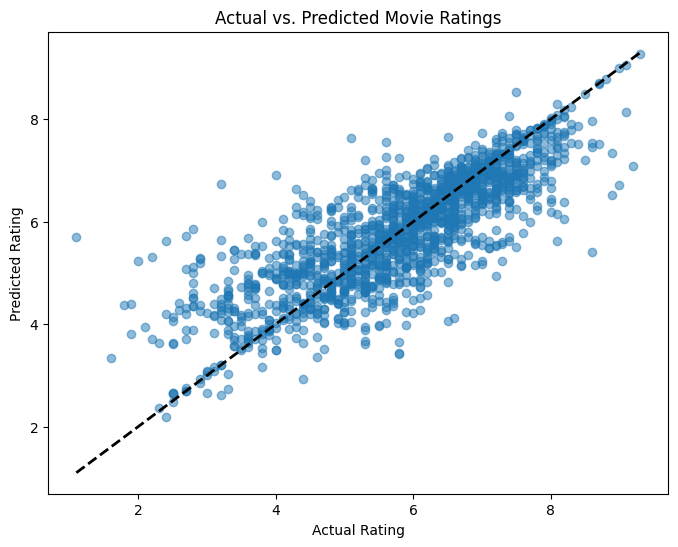

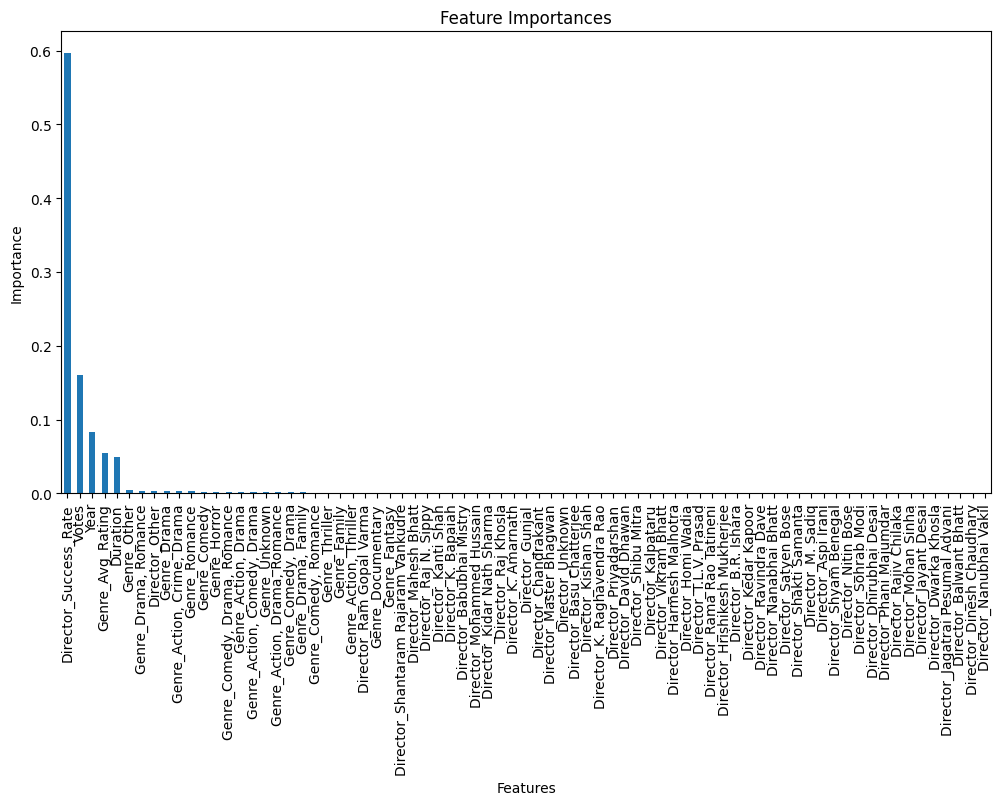

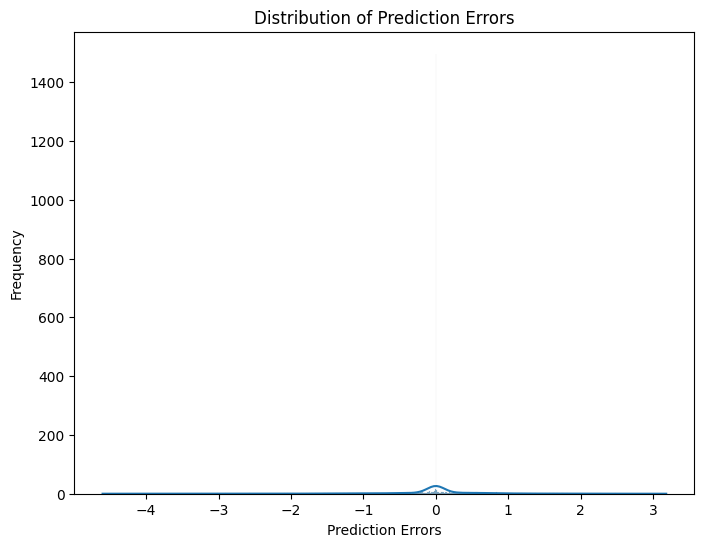

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Create a scatter plot of actual vs. predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs. Predicted Movie Ratings")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.show()


# Feature importance plot
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# Distribution of errors
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.xlabel("Prediction Errors")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.show()